<a href="https://colab.research.google.com/github/ishandahal/stats453-deep_learning_torch/blob/main/perceptron_adaline_linear_regression/perceptron_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STAT 453: Introduction to Deep Learning and Generative Models (Spring 2020)**

Instructor: Sebastian Raschka (sraschka@wisc.edu)   

Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat453-ss2020/  

GitHub repository: https://github.com/rasbt/stat453-deep-learning-ss20

In [ ]:
pip install watermark

In [ ]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p matplotlib

Sebastian Raschka 

CPython 3.6.9
IPython 5.5.0

matplotlib 3.2.2


# HW 1: Implementing the Perceptron Algorithm in "Just" Python (50 pts)

In this homework assignment, you are asked to implement the classic Perceptron by Frank Rosenblatt for binary classification (here: 0/1 class labels), which we have discussed in the lecture. 

In particular, you should only use "basic" or "vanilla" Python functions for this implementation. Hence, no `import`s besides matplotlib will be permitted for this homework.

The goal of this exercise is to familiarize yourself with NumPy implementation that we discussed in class. Hence, you may wish to explore the NumPy code from the lecture further when you implement the Perceptron in "pure" Python. Note that you are also asked to use the overal structure of the `Perceptron` Python `class`. While it may seem strange to you at first, it will be useful later when will discuss PyTorch for deep learning. The way PyTorch works is similar to this class (i.e., using a model `class` with `forward` and `backward` methods). 

### Important!

**The homework assignment is due on Thu, Feb 6, 2020 (11:59 pm) and should be submitted via Canvas.**

- Please submit the `.ipynb` file with your solution as well as an HTML version (use `File -> export as -> HTML`) as a backup in case we cannot open your .ipynb on our computer.

- I recommend using the conda package manager for installing Python 3.7 and Jupyter Notebook (or Jupyter Lab). You may find the lecture notes from my previous machine learning class (https://github.com/rasbt/stat479-machine-learning-fs19/blob/master/03_python/03-python__notes.pdf, Section 3) helpful. 

- Also consider this YouTube tutorial for a more visual setup guide for conda: https://www.youtube.com/watch?v=YJC6ldI3hWk (Python Tutorial: Anaconda - Installation and Using Conda). Please reach out to me or the TA if you need any help of have questions.


## 0) Imports

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Loading the dataset

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [ ]:
X, y = [], []

with open('/content/dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))
        
print(len(X), len(y))

100 100


In [ ]:
import random


random.seed(123)

idx = list(range(len(X)))
random.shuffle(idx)

X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

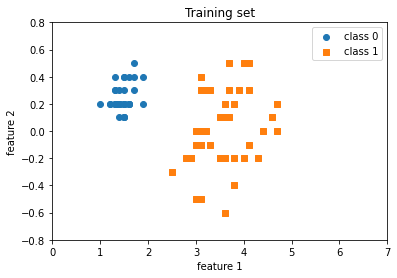

In [ ]:
 plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## Defining the Perceptron model

Below, you need to complete the code of the Perceptron model class based on the framework I provided.

In [ ]:
class Perceptron():
    def __init__(self, num_features):
        # self.num_features = num_features
        self.weights = [0.0] * num_features
        self.bias = 0.0

    def forward(self, x):
        linear = sum(w * x for w, x in zip(self.weights, x)) + self.bias
        if linear > -0.1:
            prediction = 1
        else:
            prediction = 0
        return prediction

    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(len(y)):
                errors = self.backward(x[i], y[i])
                self.weights[0] += errors * x[i][0]
                self.weights[1] += errors * x[i][1]
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = [self.forward(datum) for datum in x]
        res = sum([1 for prediction, label in zip(predictions, y) if prediction == label])
        accuracy = res / len(y)
        return accuracy

## Training the Perceptron

Here, you are asked to train the perceptron for 5 epochs and print out the Perceptron weight parameters and the value of the bias unit after training.

- The code should be relatively similar to the code you've seen in the lecture.

In [ ]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, 5)

print('Model Parameters: \n\n')
print(f"    Weights: {ppn.weights}")
print(f"    Bias: {ppn.bias}")

Model Parameters: 


    Weights: [1.7999999999999992, -1.3000000000000003]
    Bias: -4.0


## Evaluating the model

Compute the prediction accuracy (in percent) for both the training set and the test set.

In [ ]:
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [ ]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


## Decision Boundary

Make 2 scatterplots: 1 for the training dataset and 1 for the test dataset. Draw the respective decision boundaries of the perceptron in each plot (similar to the code example you have seen in the lecture).

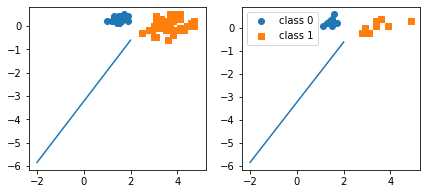

In [ ]:
##########################
### 2D Decision Boundary
##########################

w, b = ppn.weights, ppn.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b) 
            / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

ax[0].scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

ax[1].scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')

ax[1].scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')

# ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
# ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

# ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
# ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()